In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv("Malayalam_Char_Gabor.csv")
df.drop("ImageName",axis=1,inplace=True)
df.head(3)

,Label,Theta0_Lambda1_LocalEnergy,Theta0_Lambda1_MeanAmplitude,Theta0_Lambda0_LocalEnergy,Theta0_Lambda0_MeanAmplitude,Theta0_Lambda0_LocalEnergy.1,Theta0_Lambda0_MeanAmplitude.1,Theta0_Lambda0_LocalEnergy.2,Theta0_Lambda0_MeanAmplitude.2,Theta0_Lambda0_LocalEnergy.3,...,Theta0_Lambda1_LocalEnergy.3,Theta0_Lambda1_MeanAmplitude.3,Theta0_Lambda0_LocalEnergy.12,Theta0_Lambda0_MeanAmplitude.12,Theta0_Lambda0_LocalEnergy.13,Theta0_Lambda0_MeanAmplitude.13,Theta0_Lambda0_LocalEnergy.14,Theta0_Lambda0_MeanAmplitude.14,Theta0_Lambda0_LocalEnergy.15,Theta0_Lambda0_MeanAmplitude.15
0,3453,39752,24995,28698,22220,47492,39752,24995,28698,22220,...,3504689,3487904,3468278,1963883,2072174,3508397,3491984,3469319,1962913,2071265
1,3453,63716,40885,44338,34134,80364,63716,40885,44338,34134,...,4916428,4888272,4851933,2748641,2900020,4916784,4888045,4851383,2748266,2899613
2,3453,74632,62911,69469,55907,73178,74632,62911,69469,55907,...,5481859,5456359,5412212,3056522,3225966,5486808,5462044,5413867,3054577,3224056


# **A1**

In [5]:
# Identifying non-numeric columns
x=df.drop("Label",axis=1)
y=df["Label"]


# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(x)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)

# Checking inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)

K=3 Inertia: 1.1332399954038896e+17
K=5 Inertia: 4.14442991924959e+16


# **A2**

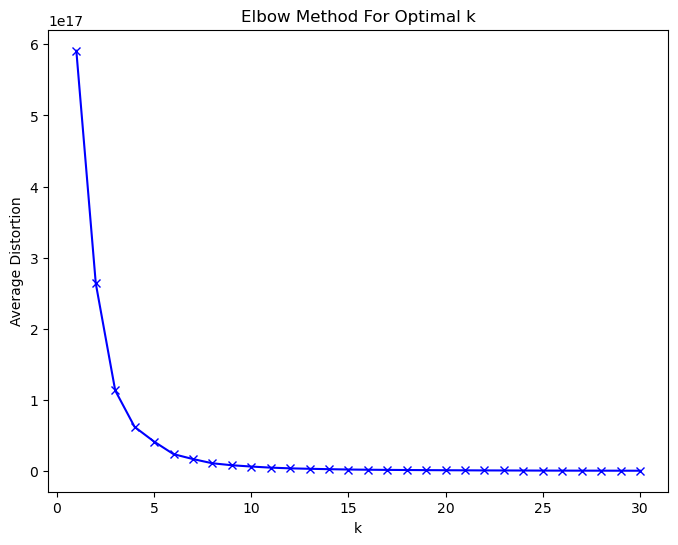

In [6]:
# Determining the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# **A3**

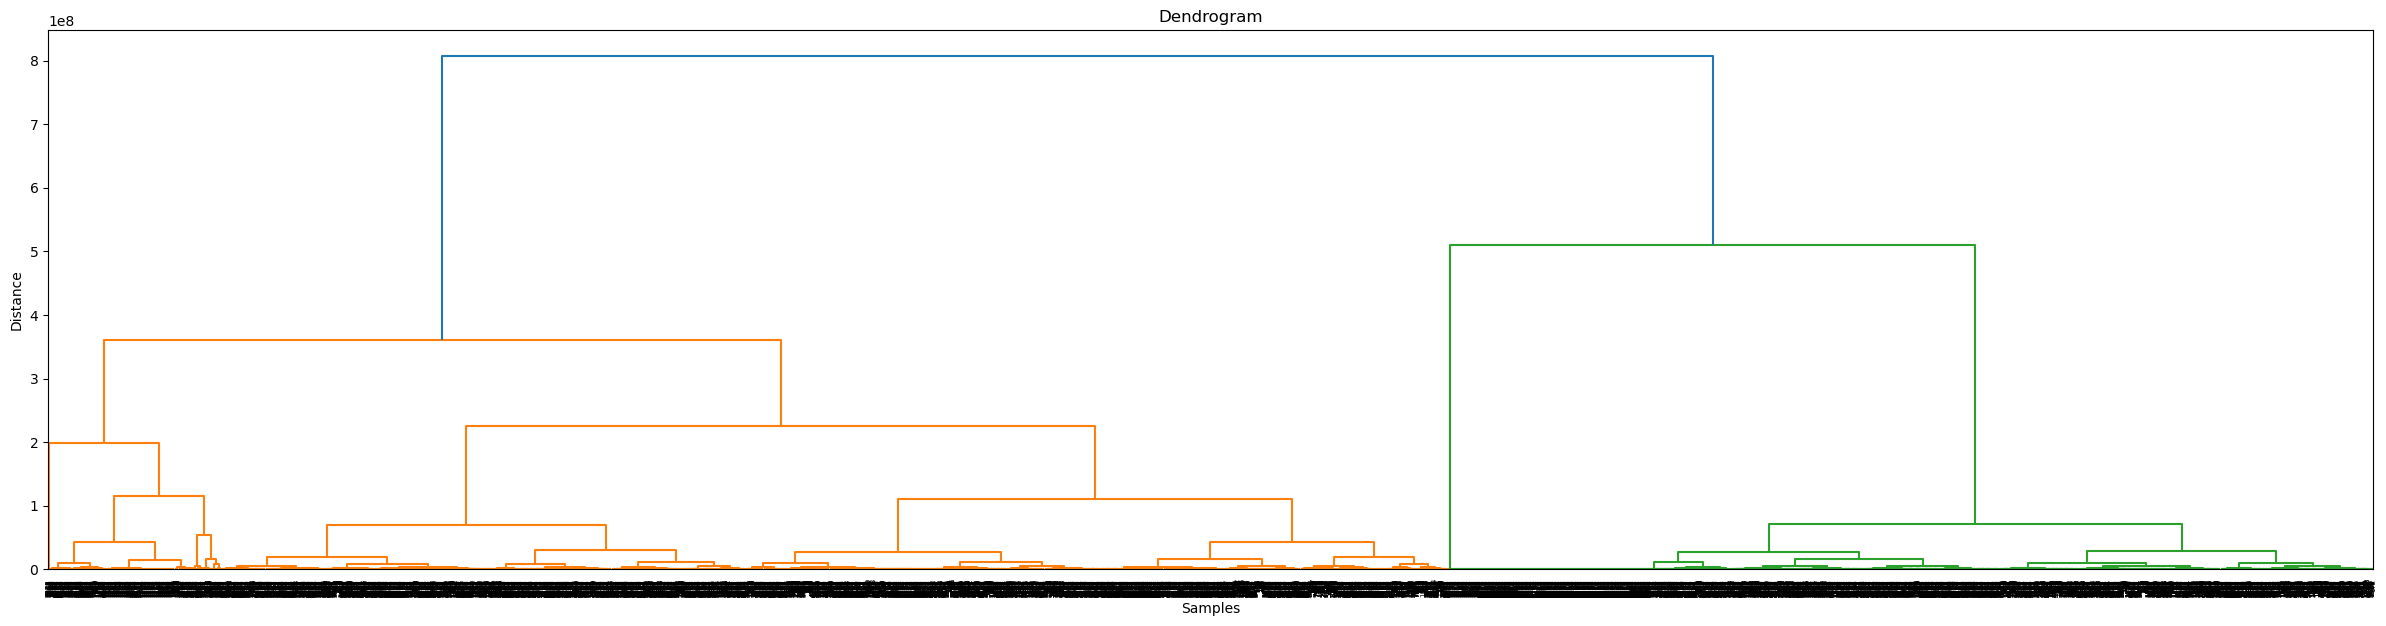

In [7]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(30, 7))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# **A4**

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Separating features and target

X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(x, y)

# Getting selected features
selected_features = x.columns[selector.support_]


In [14]:
from sklearn.decomposition import PCA

# Performing PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
x_pca = pca.fit_transform(x)

# Getting the no.of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Printting the no.of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)

Number of features needed for 95% variance in PCA: 1


# **A5**

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(x)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 0.053987730061349694
